In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\GOPINATH CHENNAMSETT\Desktop\MINI PROJECT\Harvestify-master\Harvestify-master\Data-processed\crop_recommendation.csv')
df2=pd.read_csv(r"C:\Users\GOPINATH CHENNAMSETT\Desktop\MINI PROJECT\Harvestify-master\Harvestify-master\Data-processed\agriculturedata.csv")
df3=pd.read_csv(r"C:\Users\GOPINATH CHENNAMSETT\Desktop\MINI PROJECT\Harvestify-master\Harvestify-master\Data-processed\soil.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,76,35,43,20.879744,82.002744,6.502985,202.935536,rice
1,90,51,45,21.770462,80.319644,7.038096,226.655537,rice
2,94,37,36,23.004459,82.320763,7.840207,263.964248,rice
3,60,47,37,26.491096,80.158363,6.980401,242.864034,rice
4,75,57,41,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df2.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04-03-2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04-03-2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04-03-2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04-03-2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04-03-2019,110000,130000,120000


In [5]:
df.dropna()

,N,P,K,temperature,humidity,ph,rainfall,label
0,76,35,43,20.879744,82.002744,6.502985,202.935536,rice
1,90,51,45,21.770462,80.319644,7.038096,226.655537,rice
2,94,37,36,23.004459,82.320763,7.840207,263.964248,rice
3,60,47,37,26.491096,80.158363,6.980401,242.864034,rice
4,75,57,41,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,83,33,33,26.774637,66.413269,6.780064,177.774507,coffee
2196,111,33,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,113,21,27,24.131797,67.225123,6.362608,173.322839,coffee
2198,107,16,31,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
df.size

17600

In [7]:
df.describe(include='all')

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.608636,52.882727,48.260000,25.616244,71.481779,6.469480,103.463655,NaN
std,37.530197,32.649542,50.716088,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,19.000000,27.000000,21.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,50.500000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,86.000000,67.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [8]:
df.shape

(2200, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


In [11]:
df.loc[0]

N                      76
P                      35
K                      43
temperature     20.879744
humidity        82.002744
ph               6.502985
rainfall       202.935536
label                rice
Name: 0, dtype: object

In [12]:
df.groupby('temperature').mean()

,N,P,K,humidity,ph,rainfall
temperature,,,,,,
8.825675,7.0,134.0,195.0,82.897537,5.536646,67.235765
9.467960,9.0,131.0,201.0,82.293355,5.800243,66.027652
9.535586,36.0,143.0,203.0,80.731127,5.908724,69.441152
9.724458,20.0,132.0,197.0,83.747656,6.158689,74.464111
9.851243,10.0,123.0,203.0,80.226317,5.965379,68.428024
...,...,...,...,...,...,...
43.037143,69.0,47.0,46.0,94.642890,6.720744,41.585659
43.080227,60.0,61.0,45.0,93.903057,6.542777,211.852906
43.302049,39.0,46.0,47.0,92.834054,6.641099,110.562229


In [13]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [14]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [15]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [16]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.608636,52.882727,48.260000,25.616244,71.481779,6.469480,103.463655
std,37.530197,32.649542,50.716088,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,19.000000,27.000000,21.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,50.500000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,86.000000,67.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [17]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [18]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [19]:
df2.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [20]:
states=df2.state.value_counts().index
states

Index(['Uttar Pradesh', 'Kerala', 'Tamil Nadu', 'Punjab', 'West Bengal',
       'Maharashtra', 'Gujarat', 'Himachal Pradesh', 'Odisha', 'Haryana',
       'Assam', 'Manipur', 'Madhya Pradesh', 'Rajasthan', 'Karnataka',
       'Uttrakhand', 'Tripura', 'Telangana', 'Andaman and Nicobar',
       'Andhra Pradesh', 'Pondicherry', 'Meghalaya', 'Nagaland', 'Chattisgarh',
       'Jammu and Kashmir', 'Goa'],
      dtype='object')

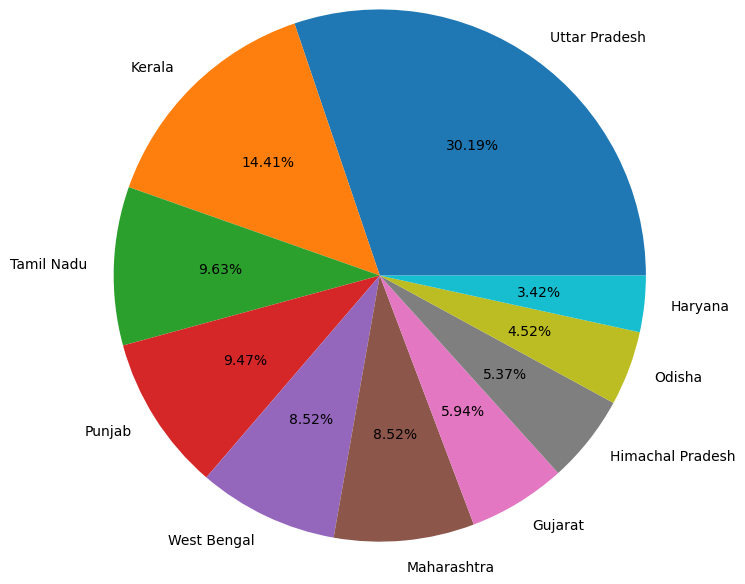

In [21]:
plt.pie(df2.state.value_counts().to_list()[:10], labels=df2.state.value_counts().index[:10], radius=1.8, autopct="%0.2f%%")
plt.show()

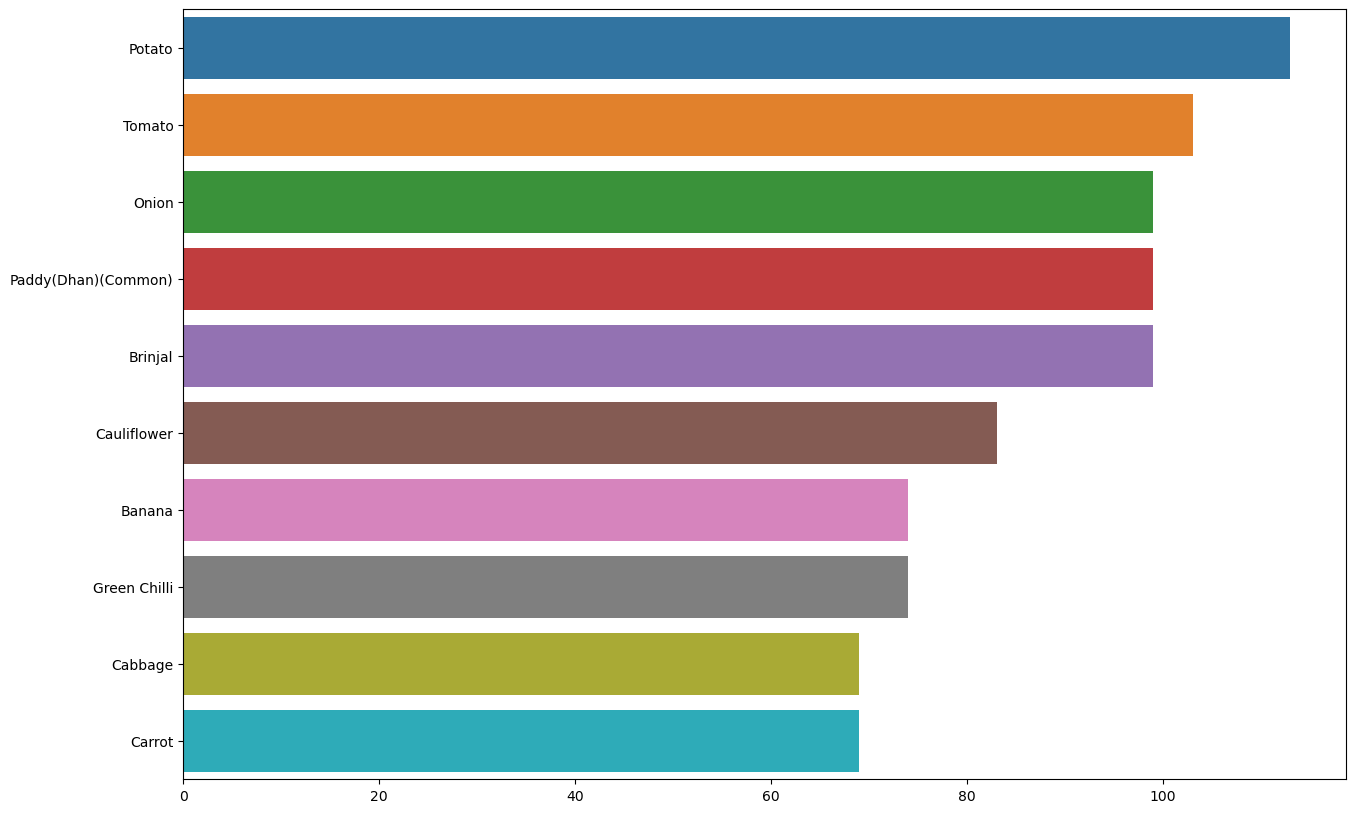

In [22]:
values = df2.commodity.value_counts().to_list()[:10]
labels = df2.commodity.value_counts().index[:10]

plt.figure(figsize=(15,10))
sns.barplot(x=values, y=labels)
plt.show()

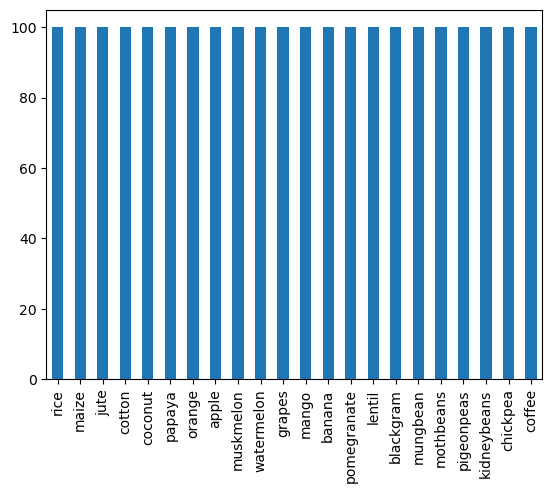

In [23]:
labels = df["label"].unique()
df["label"].value_counts().plot(kind="bar")
plt.show()

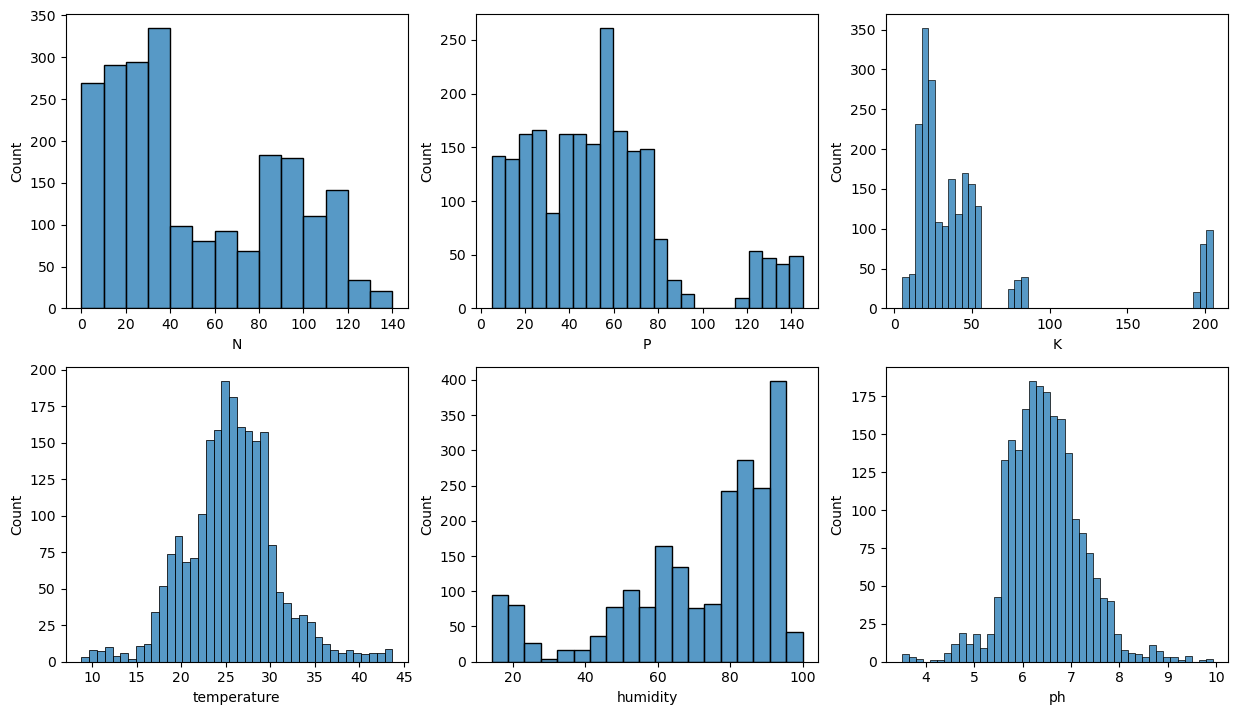

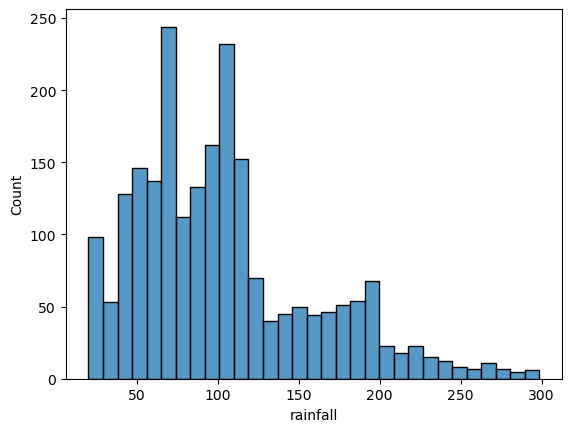

In [24]:
all_columns = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(df[column])
    i+=1
plt.show()

sns.histplot(df[all_columns[-1]])
plt.show()

<AxesSubplot:>

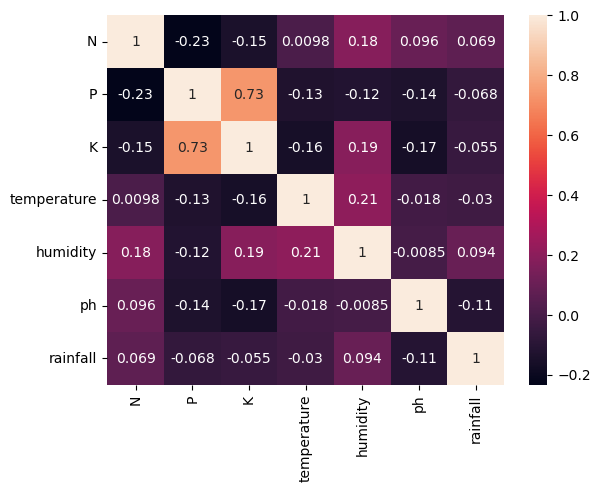

In [25]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

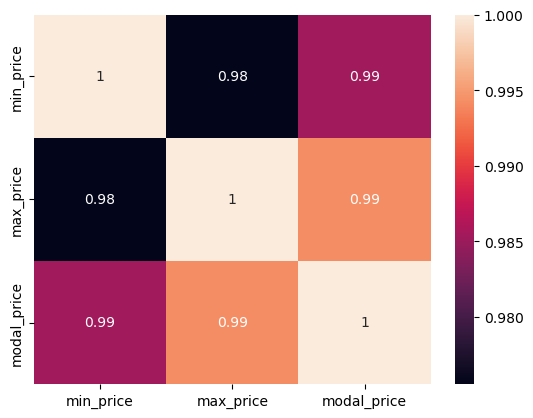

In [26]:
sns.heatmap(df2.corr(),annot=True)

# DISTRIBUTION PLOTS

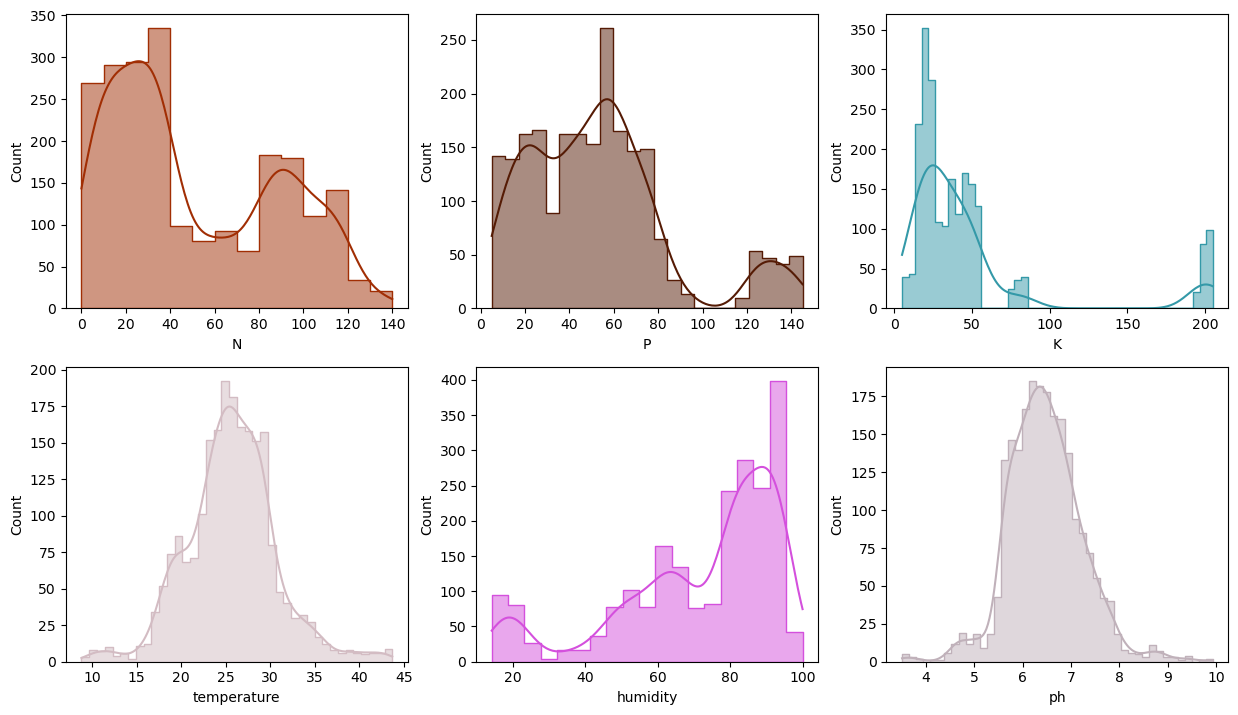

In [27]:
all_columns = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    rgb = np.random.rand(3,)
    sns.histplot(df[column], kde = True, color = rgb, element = 'step')
    i+=1
plt.show()


# REQUIREMENTS PLOTS

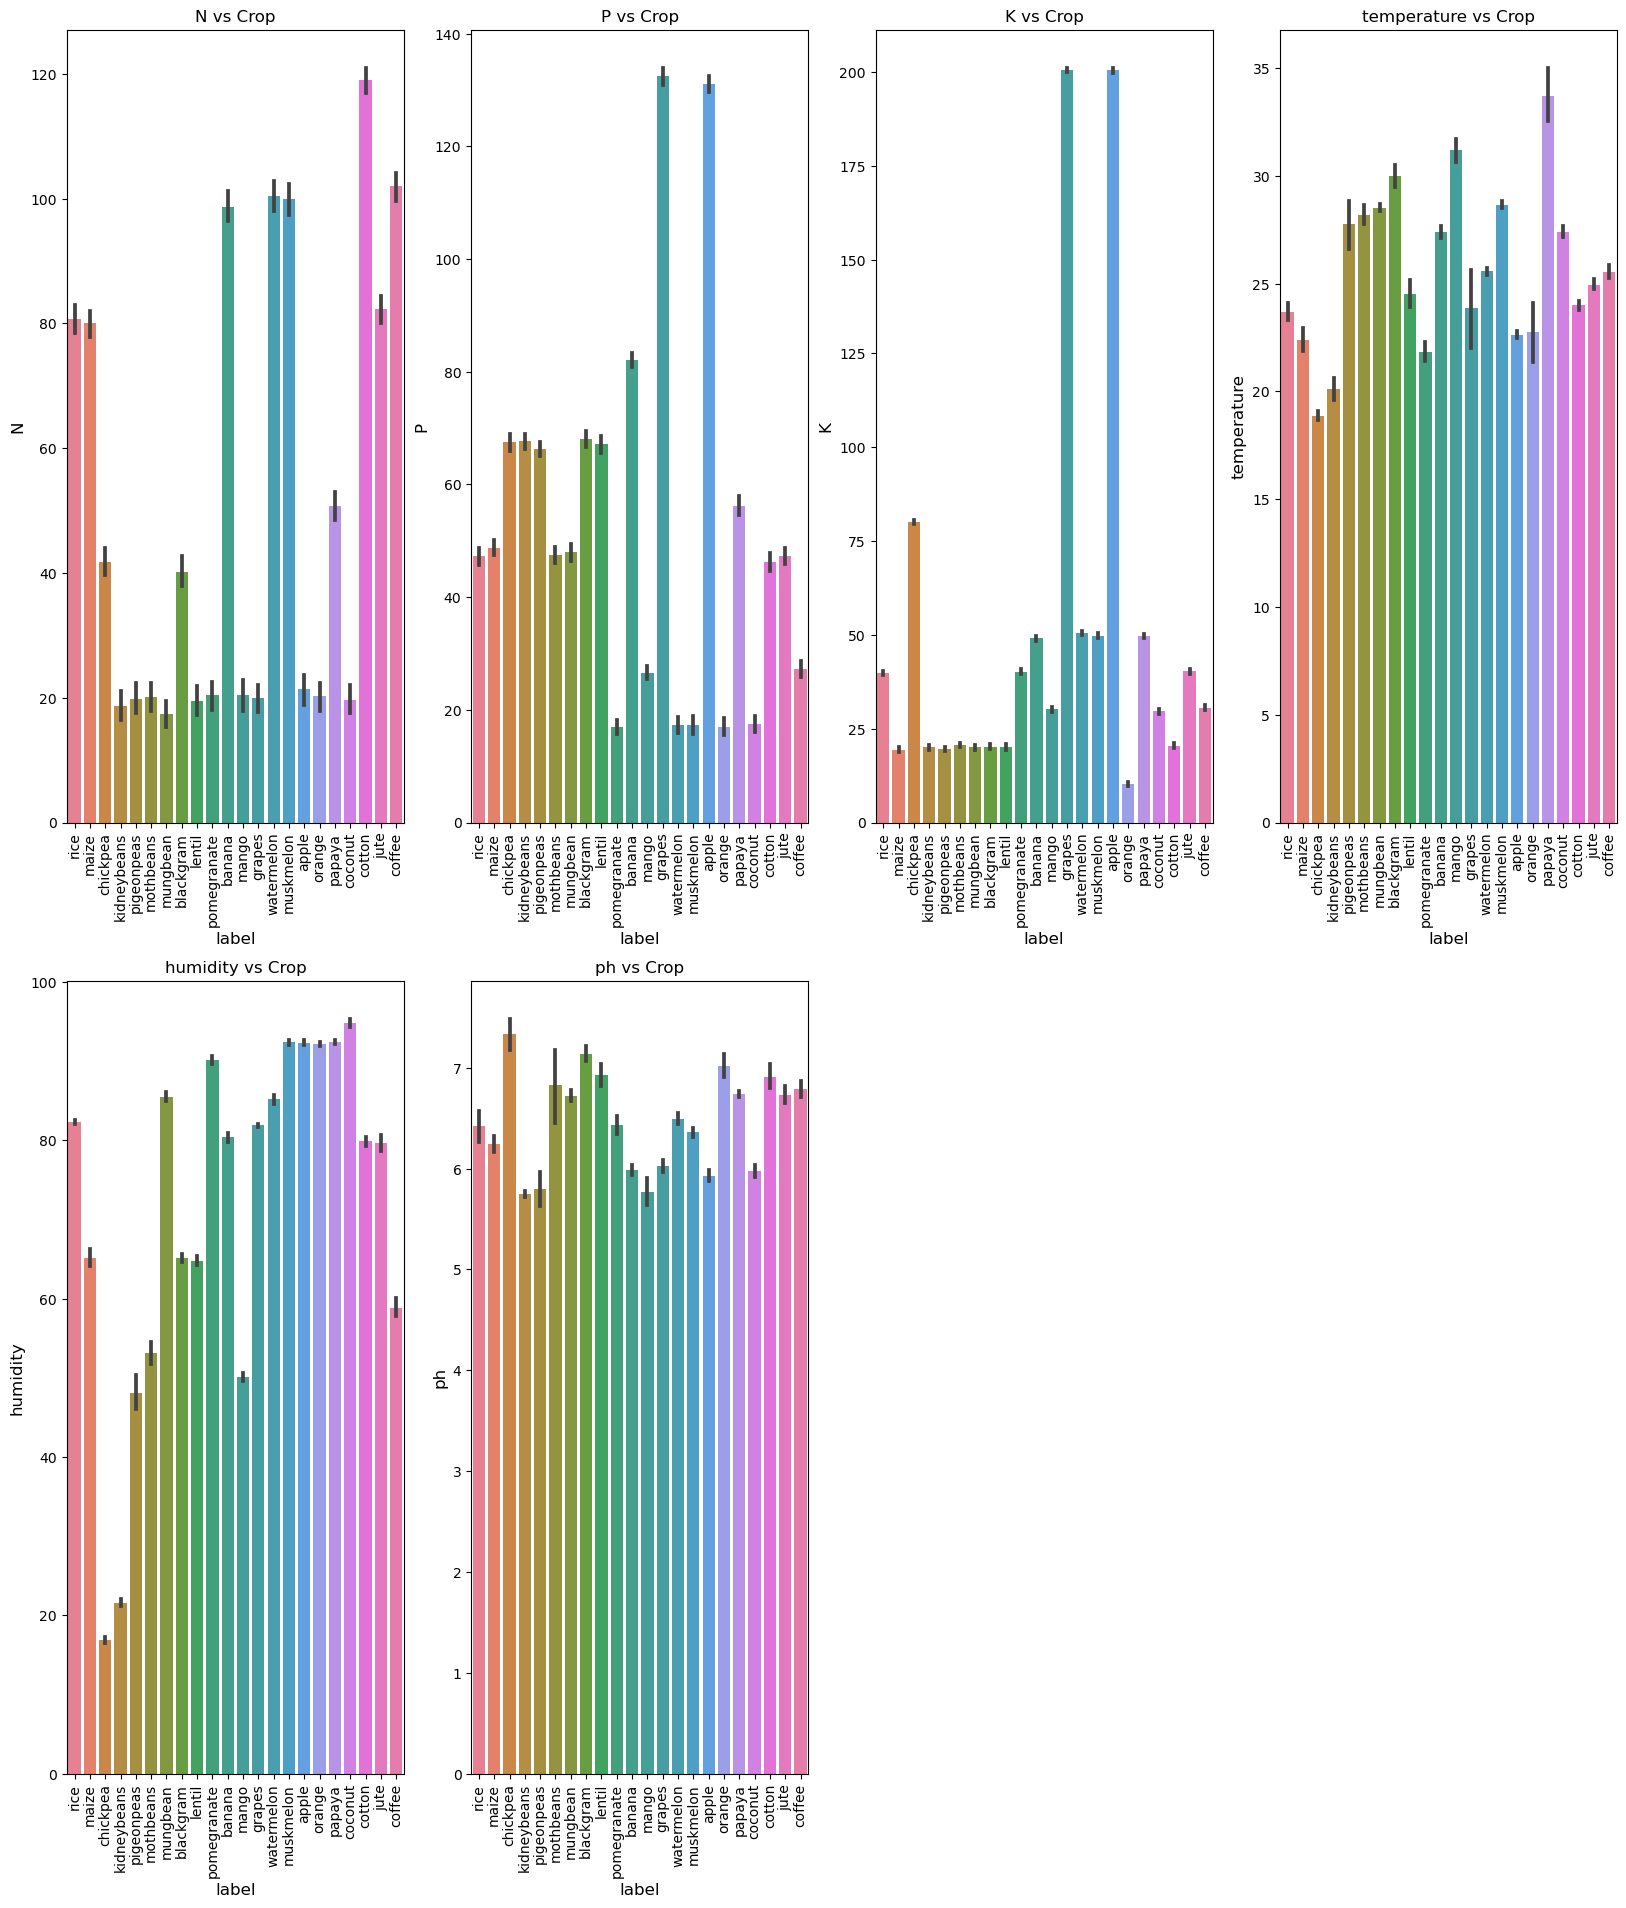

In [28]:
plt.figure(figsize=(20,35))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,4,i)
    sns.barplot(x = 'label', y = column, data = df, palette = 'husl')
    plt.xlabel('label', fontsize = 12)
    plt.ylabel(column, fontsize = 12)
    plt.xticks(rotation=90)
    
    plt.title(f'{column} vs Crop')
    i+=1
plt.show()

# CATEGORICAL PLOT

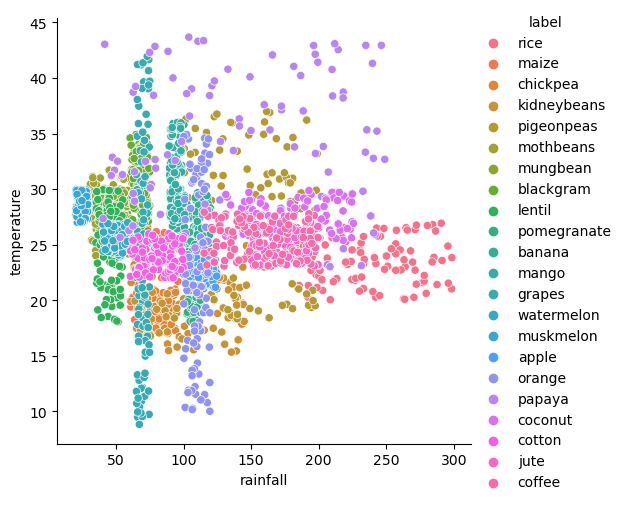

In [29]:
sns.relplot(x='rainfall',y='temperature',data=df,kind='scatter',hue='label',height=5)
plt.show()

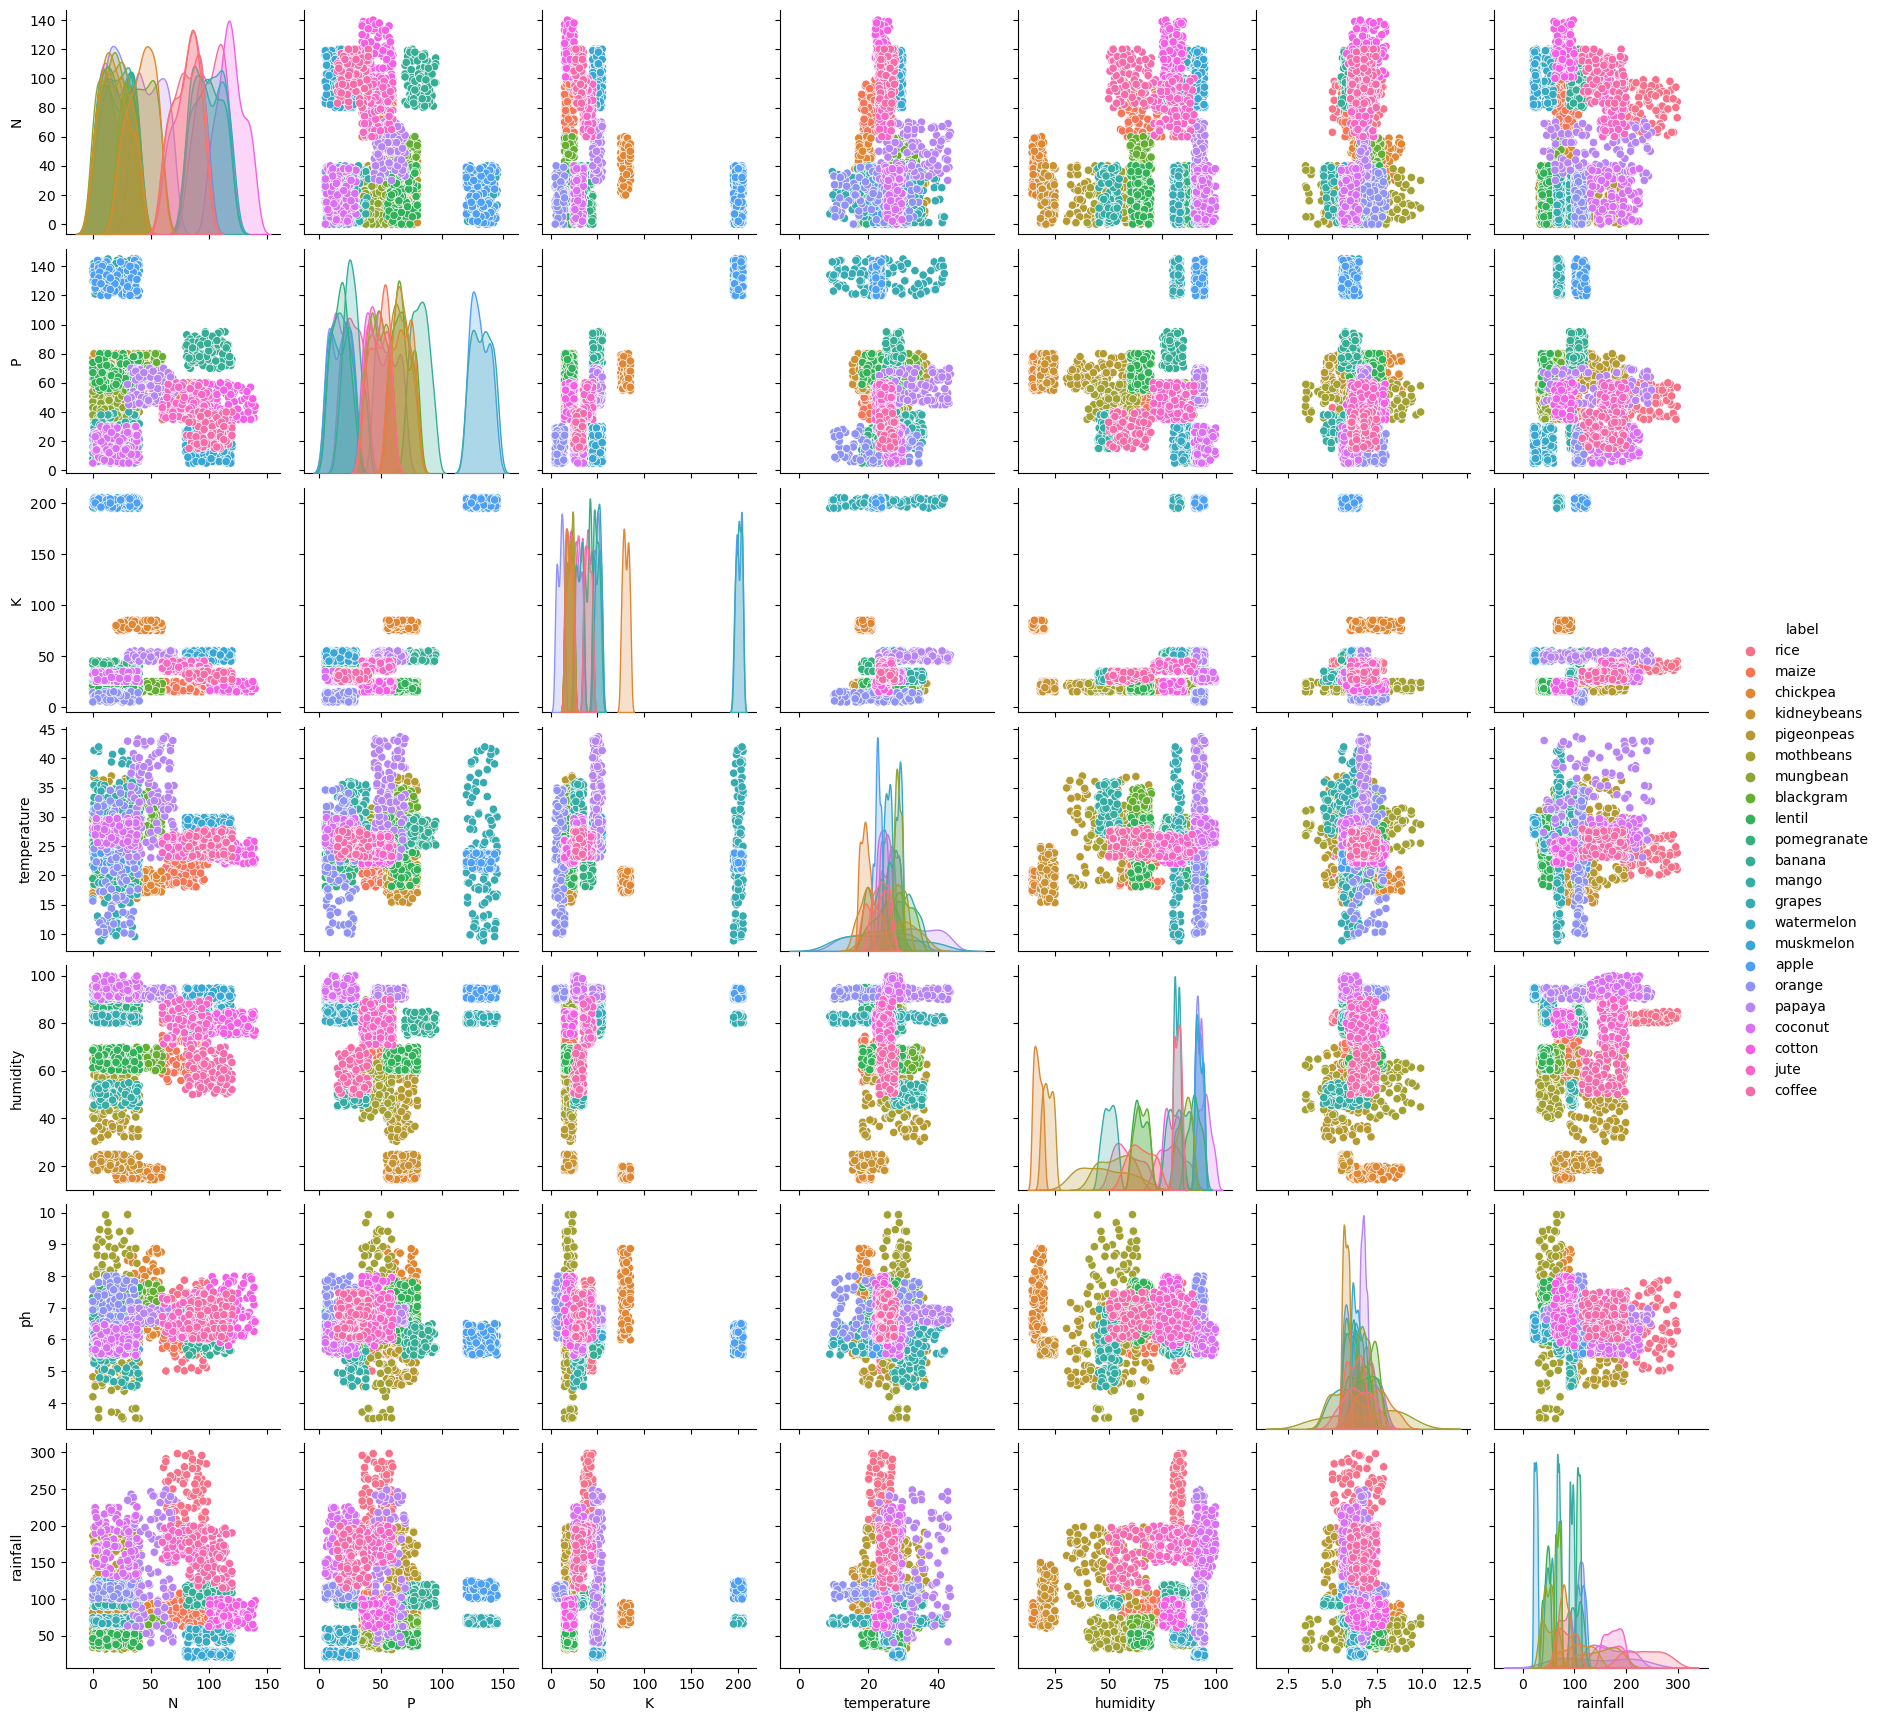

In [30]:
sns.pairplot(data=df,hue='label')
plt.show()

# OUTLIER DETECTION

In [31]:
# Unique values in the label column

crops = df['label'].unique()
print(len(crops))
print(crops)
print(pd.value_counts(df['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [32]:
# Filtering each unique label and store it in a list df2 for to plot the box plot

df2=[]
for i in crops:
    df2.append(df[df['label'] == i])
df2[1].head()

,N,P,K,temperature,humidity,ph,rainfall,label
100,69,54,18,22.613600,63.690706,5.749914,87.759539,maize
101,85,56,20,26.100184,71.574769,6.931757,102.266244,maize
102,92,47,19,23.558821,71.593514,6.657965,66.719955,maize
103,88,50,18,19.972160,57.682729,6.596061,60.651715,maize
104,86,53,16,18.478913,62.695039,5.970458,65.438354,maize


In [33]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")
detect_outlier(df['K'][df['label']=='grapes'])

Lower limit: 190.5 Upper limit: 210.5
Minimum value: 195   MAximum Value: 205
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier


In [34]:
for i in df['label'].unique():
    detect_outlier(df['K'][df['label']==i])
    print('---------------------------------------------')

Lower limit: 28.0 Upper limit: 52.0
Minimum value: 35   MAximum Value: 45
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 8.875 Upper limit: 29.875
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 70.5 Upper limit: 90.5
Minimum value: 75   MAximum Value: 85
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 8.0 Upper limit: 32.0
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - N

In [35]:
x = df.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,76,35,43,20.879744,82.002744,6.502985,202.935536
1,90,51,45,21.770462,80.319644,7.038096,226.655537
2,94,37,36,23.004459,82.320763,7.840207,263.964248
3,60,47,37,26.491096,80.158363,6.980401,242.864034
4,75,57,41,20.130175,81.604873,7.628473,262.717340


In [36]:
cols_with_missing=[col for col in df.columns if df[col].isnull().any()]

In [37]:
cols_with_missing

[]

# Seperating features and target label

In [38]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [39]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [40]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# DECISION TREE ALGORITHM

In [41]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  91.5909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.87      0.95      0.91        21
       mango       1.00      0.92      0.96        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [42]:
from sklearn.model_selection import cross_val_score
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.925     , 0.90227273, 0.925     , 0.91363636, 0.94090909])

# Saving trained Decision Tree model

In [43]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [45]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99772727, 0.99545455, 0.99772727, 0.99090909])

# Saving trained Guassian Naive Bayes model 

In [46]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9727272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.80      0.86      0.83        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       1.00      1.00      1.00        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.95      0.95      0.95        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [48]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97727273, 0.98409091, 0.98181818, 0.98409091, 0.98409091])

# Saving trained SVM model

In [49]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9568181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      0.94      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       0.86      0.95      0.90        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      0.96      0.96        23
       maize       0.95      0.86      0.90        21
       mango       1.00      0.96      0.98        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [51]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95681818, 0.95      , 0.97045455, 0.96818182, 0.96590909])

# Saving trained Logistic Regression model

In [52]:
import pickle

LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [54]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99090909, 0.99318182, 0.99318182, 0.99545455, 0.99090909])

# Saving trained Random Forest model

In [55]:
import pickle

RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# KNN

In [56]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(Xtrain, Ytrain)
predicted_values = knn.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('KNN')
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


KNN's Accuracy is:  0.9636363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.84      1.00      0.91        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.81      0.89      0.85        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.79      0.88        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [57]:
# Cross validation score (KNN)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.97954545, 0.97727273, 0.97272727, 0.97727273, 0.97045455])

# Saving trained KNN model

In [58]:
import pickle

KNN_pkl_filename = '../models/KNN.pkl'
# Open the file to save as pkl file
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(knn, KNN_Model_pkl)
# Close the pickle instances
KNN_Model_pkl.close()

# Bagging Classifier

In [59]:
## import the scikit-learn model ##
from sklearn.ensemble import BaggingClassifier

## declare a bagging classifier instance ##
ens = BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),n_estimators=100)
ens.fit(Xtrain, Ytrain)
predicted_values = ens.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Bagging Classifier')
print("Bagging Classifier's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Bagging Classifier's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.94      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00    

In [60]:
# Cross validation score (BAGGINGCLASSIFIER)
score = cross_val_score(ens,features,target,cv=5)
score


array([0.99318182, 0.99318182, 0.99318182, 0.99545455, 0.99090909])

# Saving trained Bagging Classifier model

In [61]:
import pickle

BC_pkl_filename = '../models/BC.pkl'
# Open the file to save as pkl file
BC_Model_pkl = open(BC_pkl_filename, 'wb')
pickle.dump(ens, BC_Model_pkl)
# Close the pickle instances
BC_Model_pkl.close()

# GradientBoost

In [62]:

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(Xtrain, Ytrain)
predicted_values = GBC.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('GRADIENT BOOST Classifier')
print("Gradient Boost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


Gradient Boost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.94      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.89      0.94        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.0

In [63]:
# Cross validation score (GRADIENTBOOST)
score = cross_val_score(GBC,features,target,cv=5)
score

array([0.99090909, 0.99090909, 0.98636364, 0.99318182, 0.98863636])

# Saving trained GradientBoost model

In [64]:
import pickle

GBC_pkl_filename = '../models/GBC.pkl'
# Open the file to save as pkl file
GBC_Model_pkl = open(GBC_pkl_filename, 'wb')
pickle.dump(GBC, GBC_Model_pkl)
# Close the pickle instances
GBC_Model_pkl.close()

# LIGHTGBM

In [65]:
import lightgbm as ltb
lgbm = ltb.LGBMClassifier()
lgbm.fit(Xtrain, Ytrain)
predicted_values = lgbm.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('LGBM Classifier')
print("Light GBM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


Light GBM's Accuracy is:  0.9840909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.94      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.93      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

In [66]:
# Cross validation score (LGBM)
score = cross_val_score(lgbm,features,target,cv=5)
score


array([0.98863636, 0.98636364, 0.98863636, 0.98863636, 0.99090909])

# Saving trained LGBM model

In [67]:
import pickle

LGBM_pkl_filename = '../models/LGBM.pkl'
# Open the file to save as pkl file
LGBM_Model_pkl = open(LGBM_pkl_filename, 'wb')
pickle.dump(lgbm, LGBM_Model_pkl)
# Close the pickle instances
LGBM_Model_pkl.close()

# Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

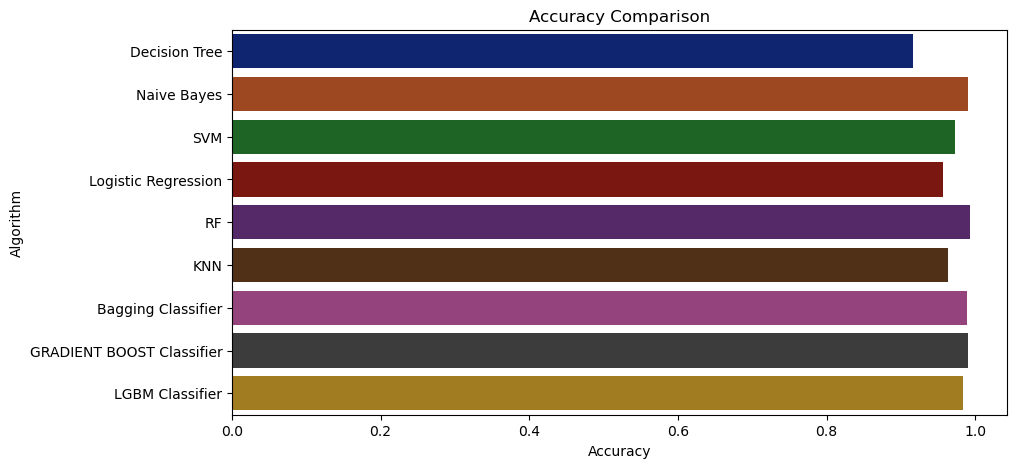

In [68]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [69]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9159090909090909
Naive Bayes --> 0.990909090909091
SVM --> 0.9727272727272728
Logistic Regression --> 0.9568181818181818
RF --> 0.9931818181818182
KNN --> 0.9636363636363636
Bagging Classifier --> 0.9886363636363636
GRADIENT BOOST Classifier --> 0.990909090909091
LGBM Classifier --> 0.9840909090909091


# Making a prediction

In [70]:
data = np.array([[7,5,4,20.8,80,6.5,190]])
dic={'Telangana': 'Red and Yellow', 'Andhra pradesh': 'Red and Yellow', 'Assam': 'alluvial', 'Bihar': 'alluvial', 'Karnataka': 'Black', 'Tamilnadu': 'Red', 'Chattisgarh': 'Red and Yellow', 'Goa': 'Red and Yellow', 'Gujarat': 'Black', 'Haryana': 'alluvial', 'Himachal pradesh': 'alluvial', 'Jharkhand': 'Red and Yellow', 'Kerela': 'laterite', 'Madhya Pradesh': 'Black', 'Maharastra': 'Black', 'Manipur': 'Red and Yellow', 'Meghalaya': 'alluvial', 'Mizoram': 'Red', 'Nagaland': 'Red', 'Odisha': 'Red', 'Punjab': 'alluvial', 'Rajasthan': 'Desert', 'Sikkim': 'Mountain', 'Tripura': 'Red', 'Uttar Pradesh': 'Alluvial', 'West bengal': 'Alluvial', 'Arunachal Pradesh': 'Red'}
prediction = RF.predict(data)
geoloc=input("Enter the GeoLocation:")
print(prediction,"is BEST CROP to grow ")
print(geoloc.capitalize(),"is majorly covered by",dic[geoloc.capitalize()] ,"Soil.")

Enter the GeoLocation:Goa
['orange'] is BEST CROP to grow 
Goa is majorly covered by Red and Yellow Soil.


In [71]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


# PREDICTION

In [72]:
df = pd.read_csv(r'C:\Users\GOPINATH CHENNAMSETT\Desktop\MINI PROJECT\Harvestify-master\Harvestify-master\Data-processed\crop_recommendation.csv')
df2=pd.read_csv(r"C:\Users\GOPINATH CHENNAMSETT\Desktop\MINI PROJECT\Harvestify-master\Harvestify-master\Data-processed\agriculturedata.csv")
df3=pd.read_csv(r"C:\Users\GOPINATH CHENNAMSETT\Desktop\MINI PROJECT\Harvestify-master\Harvestify-master\Data-processed\soil.csv")

In [80]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
dic={'Telangana': 'Red and Yellow', 'Andhra pradesh': 'Red and Yellow', 'Assam': 'alluvial', 'Bihar': 'alluvial', 'Karnataka': 'Black', 'Tamilnadu': 'Red', 'Chattisgarh': 'Red and Yellow', 'Goa': 'Red and Yellow', 'Gujarat': 'Black', 'Haryana': 'alluvial', 'Himachal pradesh': 'alluvial', 'Jharkhand': 'Red and Yellow', 'Kerala': 'laterite', 'Madhya Pradesh': 'Black', 'Maharastra': 'Black', 'Manipur': 'Red and Yellow', 'Meghalaya': 'alluvial', 'Mizoram': 'Red', 'Nagaland': 'Red', 'Odisha': 'Red', 'Punjab': 'alluvial', 'Rajasthan': 'Desert', 'Sikkim': 'Mountain', 'Tripura': 'Red', 'Uttar Pradesh': 'Alluvial', 'West bengal': 'Alluvial', 'Arunachal Pradesh': 'Red'}
prediction = RF.predict(data)
d={}
for i in df2['commodity'].values:
    for j in df2['modal_price']:
        d[i]=j
my_list=df2['commodity'].values
geoloc=input("Enter the GeoLocation:")
for i in prediction:
    i=i.capitalize()
    if i in my_list:
        print(i,"is BEST CROP to grow and profit gained is RS",d[i])
print(geoloc.capitalize(),"is majorly covered by",dic[geoloc.capitalize()] ,"Soil.")


Enter the GeoLocation:Kerala
Jute is BEST CROP to grow and profit gained is RS 2100
Kerala is majorly covered by laterite Soil.
